# Purpose of this notebook


This notebook analyzes the traffic data of rail networks for the years 2019, 2020, 2021 & 1st semester of 2022.

For more information about the data and the data cleaning process please refer to notebook 1/2.

We will analyze the daily attendance data of the Ile-de-France rail network by trying to answer the following questions:
    
    - What changes in weekly/monthly patterns are observable before/during/after the COVID crisis?
    
    - What was the impact of COVID from a statistical point of view?
We will also explore some other questions about the data, and answer them with visualizations.


## Import Libraries

In [1]:
# Pandas & Numpy
import pandas as pd
import numpy as np

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import calmap
import seaborn as sns
sns.set_theme()

## Data preparation
### Load data


In [2]:
nb_2019 = pd.read_csv('datasets/nb_2019.csv')
nb_2020 = pd.read_csv('datasets/nb_2020.csv')
nb_2021 = pd.read_csv('datasets/nb_2021.csv')
nb_2022 = pd.read_csv('datasets/nb_2022.csv')


In [3]:
nb_2019.head()

,JOUR,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
0,01/01/2019,PORTE MAILLOT,71379,?,38
1,01/01/2019,PORTE MAILLOT,71379,AMETHYSTE,91
2,01/01/2019,PORTE MAILLOT,71379,FGT,122
3,01/01/2019,PORTE MAILLOT,71379,IMAGINE R,531
4,01/01/2019,PORTE MAILLOT,71379,NAVIGO,2336


In [4]:
nb_2020.head()

,JOUR,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
0,01/01/2020,PORTE MAILLOT,71379,?,28
1,01/01/2020,PORTE MAILLOT,71379,AMETHYSTE,83
2,01/01/2020,PORTE MAILLOT,71379,AUTRE TITRE,94
3,01/01/2020,PORTE MAILLOT,71379,FGT,84
4,01/01/2020,PORTE MAILLOT,71379,IMAGINE R,522


In [5]:
nb_2021.head()

,JOUR,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
0,01/01/2021,PORTE MAILLOT,71379,?,45
1,01/01/2021,PORTE MAILLOT,71379,AMETHYSTE,52
2,01/01/2021,PORTE MAILLOT,71379,AUTRE TITRE,50
3,01/01/2021,PORTE MAILLOT,71379,FGT,81
4,01/01/2021,PORTE MAILLOT,71379,IMAGINE R,369


In [6]:
nb_2022.head()

,JOUR,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
0,2022-06-01,VILLENNES-SUR-SEINE,64949,NAVIGO,485
1,2022-06-01,BONNIERES,66741,?,5
2,2022-06-01,BONNIERES,66741,AMETHYSTE,8
3,2022-06-01,BONNIERES,66741,FGT,9
4,2022-06-01,BONNIERES,66741,NAVIGO,415


In [7]:
nb_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888305 entries, 0 to 1888304
Data columns (total 5 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   JOUR             object
 1   LIBELLE_ARRET    object
 2   ID_REFA_LDA      int64 
 3   CATEGORIE_TITRE  object
 4   NB_VALD          int64 
dtypes: int64(2), object(3)
memory usage: 72.0+ MB


## The loading data will be grouped base on:
    - Daily check-in on all rail netwtoks for each year
    - Weekly check-in on all rail netwtoks for each year
    - Monthly check-in on all rail netwtoks for each year


In [8]:
# Change the JOUR column to datetime with format= "day/month/Year"

nb_2019["JOUR"] = pd.to_datetime(nb_2019["JOUR"], dayfirst=True)
nb_2020["JOUR"] = pd.to_datetime(nb_2020["JOUR"], dayfirst=True)
nb_2021["JOUR"] = pd.to_datetime(nb_2021["JOUR"], dayfirst=True)
nb_2022["JOUR"] = pd.to_datetime(nb_2022["JOUR"], dayfirst=True)

wnb_2019= nb_2019.groupby(nb_2019.JOUR.dt.isocalendar().week)["NB_VALD"].sum().reset_index().rename(columns={'week':'WEEK'})
mnb_2019= nb_2019.groupby(nb_2019.JOUR.dt.month)["NB_VALD"].sum().reset_index().rename(columns={'JOUR':'MONTH'})

wnb_2020= nb_2020.groupby(nb_2020.JOUR.dt.isocalendar().week)["NB_VALD"].sum().reset_index().rename(columns={'week':'WEEK'})
mnb_2020= nb_2020.groupby(nb_2020.JOUR.dt.month)["NB_VALD"].sum().reset_index().rename(columns={'JOUR':'MONTH'})

wnb_2021= nb_2021.groupby(nb_2021.JOUR.dt.isocalendar().week)["NB_VALD"].sum().reset_index().rename(columns={'week':'WEEK'})
mnb_2021= nb_2021.groupby(nb_2021.JOUR.dt.month)["NB_VALD"].sum().reset_index().rename(columns={'JOUR':'MONTH'})

wnb_2022= nb_2022.groupby(nb_2022.JOUR.dt.isocalendar().week)["NB_VALD"].sum().reset_index().rename(columns={'week':'WEEK'})
mnb_2022= nb_2022.groupby(nb_2022.JOUR.dt.month)["NB_VALD"].sum().reset_index().rename(columns={'JOUR':'MONTH'})

In [9]:
wnb_2022.head()

,WEEK,NB_VALD
0,1,26234573
1,2,28050853
2,3,28779155
3,4,29663738
4,5,30747931


In [10]:
mnb_2022.head()

,MONTH,NB_VALD
0,1,120197822
1,2,123678885
2,3,149283868
3,4,136241147
4,5,141238876


In [11]:
mnb_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   MONTH    6 non-null      int64
 1   NB_VALD  6 non-null      int64
dtypes: int64(2)
memory usage: 224.0 bytes


## Analysis and visualization
**1- What changes in weekly/monthly patterns are observable before/during/after the COVID crisis?**

**2- What was the impact of COVID from a statistical point of view?**

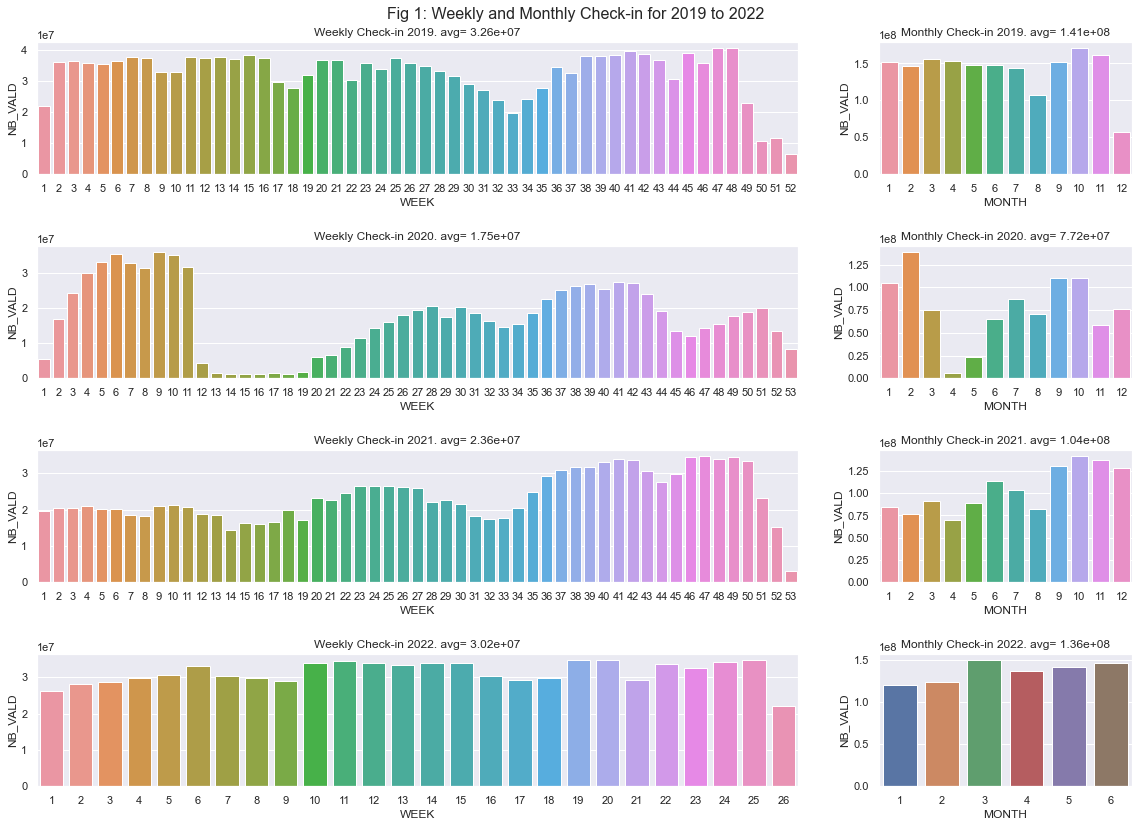

In [12]:

fig, axs = plt.subplots(4,2,figsize=(17,12), gridspec_kw={'width_ratios': [3, 1]})

fig.tight_layout(pad=4.0)
fig.suptitle('Fig 1: Weekly and Monthly Check-in for 2019 to 2022', fontsize=16)

axs[0,0].set_title("Weekly Check-in 2019. avg= "+'{:.2e}'.format(wnb_2019.NB_VALD.mean()))  
axs[0,1].set_title("Monthly Check-in 2019. avg= "+'{:.2e}'.format(mnb_2019.NB_VALD.mean()))  


sns.barplot(x="WEEK", y="NB_VALD",  data=wnb_2019, ax=axs[0, 0])
sns.barplot(x="MONTH", y="NB_VALD",  data=mnb_2019, ax=axs[0, 1])

axs[1,0].set_title("Weekly Check-in 2020. avg= "+'{:.2e}'.format(wnb_2020.NB_VALD.mean()))
axs[1,1].set_title("Monthly Check-in 2020. avg= "+'{:.2e}'.format(mnb_2020.NB_VALD.mean())) 

sns.barplot(x="WEEK", y="NB_VALD",  data=wnb_2020, ax=axs[1, 0])
sns.barplot(x="MONTH", y="NB_VALD",  data=mnb_2020, ax=axs[1, 1])

axs[2,0].set_title("Weekly Check-in 2021. avg= "+'{:.2e}'.format(wnb_2021.NB_VALD.mean()))  
axs[2,1].set_title("Monthly Check-in 2021. avg= "+'{:.2e}'.format(mnb_2021.NB_VALD.mean())) 


sns.barplot(x="WEEK", y="NB_VALD",  data=wnb_2021, ax=axs[2, 0])
sns.barplot(x="MONTH", y="NB_VALD",  data=mnb_2021, ax=axs[2, 1])

axs[3,0].set_title("Weekly Check-in 2022. avg= "+'{:.2e}'.format(wnb_2022.NB_VALD.mean())) 
axs[3,1].set_title("Monthly Check-in 2022. avg= "+'{:.2e}'.format(mnb_2022.NB_VALD.mean())) 


sns.barplot(x="WEEK", y="NB_VALD",  data=wnb_2022[wnb_2022.WEEK<52], ax=axs[3, 0])
sns.barplot(x="MONTH", y="NB_VALD",  data=mnb_2022, ax=axs[3, 1])

plt.show()

In [13]:
# Concatinating the monthly check-in for 2019 - 2022
nb_montly_2019_2022=pd.concat([mnb_2019.NB_VALD,mnb_2020.NB_VALD,mnb_2021.NB_VALD,mnb_2022.NB_VALD], axis=0).to_frame().reset_index(drop=True)

<AxesSubplot:xlabel='Months', ylabel='No. of check-in'>

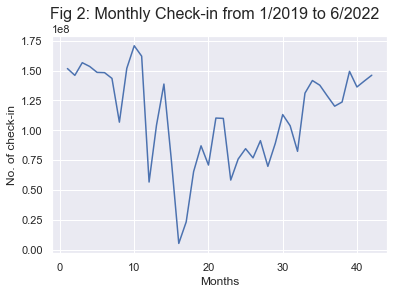

In [14]:
axs[0,0].set_title("Weekly Check-in 2019. avg= "+'{:.2e}'.format(wnb_2019.NB_VALD.mean()))  
axs[0,1].set_title("Monthly Check-in 2019. avg= "+'{:.2e}'.format(mnb_2019.NB_VALD.mean()))  

fig, ax = plt.subplots()
fig.suptitle('Fig 2: Monthly Check-in from 1/2019 to 6/2022', fontsize=16)

ax.set_xlabel('Months')
ax.set_ylabel('No. of check-in')
sns.lineplot(x=[i for i in range(1,43)], y='NB_VALD', data=nb_montly_2019_2022, ax=ax)


We will use the above Fig1 and Fig2 to answer the two questions below:
    
1- What changes in weekly/monthly patterns are observable before/during/after the COVID crisis?

The above figures shows the changes in number of passengers used Ile-de-France rail networks weekly and monthly before/during/after the COVID crisis.

- We can see that the figures above shown evidences of high drop of no of passengers use the rail networks during lockdown period.
- We can see befor the Covide in 2019 the average of weekly and monthly checkin are 32.6M and 141M passengers.
- During the lockdown period in 2020 the average of weekly and monthly checkin are 17.5M and 77.2M passengers, eventhough the lockdown for short periods during 2020 but we can see the 50% less of passangers used the raail network compare to 2019. This is very clear by looking to the last week of March week 12 till week 19 (first lockdown period).
- In 2021 we can see the increase in the average of weekly and monthly checkin 23.6M and 104M passengers.
- In first half of 2022 we can see increase of average than 2021 with weekly and monthly checkin 30M and 136M passengers. 
- Traffic drops during national holidays. The decline in traffic is less significant during school holidays, apart from summer holidays (August).
- As we can seen in Fig2 there is an increase in the number of passenger but it did not reach the same level as befor COVID crisis.
    

2- What was the impact of COVID from a statistical point of view?

The impacts of COVID across a range of areas, including its economic, social, and many others. On the economic side, for example, as we saw the extreme drop in no of check-in in rail networks will lead to a decrease in the income of these transports. 
14 million fewer tourists explored the French capital in the first six months of 2020 compared to last year, Ile-de-France (Paris region) president Valerie Pecresse said. This is very evident when looking at extremely low traffic on rail networks. Therefore, the income generated by tourism slumped to €3.8 billion over the first six months of 2020 from €10.2 billion in the same period last year. Not only this, job losses linked to lockdown measures are estimated to be -37.2%. Many commercial establishments associated with the movement of people, such as hotels, restaurants, cafes, cinemas, recreational places, and others were closed. On the social side, divorce cases increased, crimes increased, and the level of educational attainment of students decreased.

**3- What was the most and least day triffic, in 2019, 2020, 2021, and 2022?**

Answer: The most traffic days during the last four years were Fri, 29 Nov 2019, Tue, 25 Feb 2020, Thu, 18 Nov 2021, and Tue, 21 Jun 2022

    While the least traffic days were, 25 Dec 2019, 05 Apr 2020, 01 Jan in 2021 and 2022

In [15]:
dnb_2019 = nb_2019.pivot_table(values = 'NB_VALD', index = 'JOUR', aggfunc = np.sum)
dnb_2020 = nb_2020.pivot_table(values = 'NB_VALD', index = 'JOUR', aggfunc = np.sum)
dnb_2021 = nb_2021.pivot_table(values = 'NB_VALD', index = 'JOUR', aggfunc = np.sum)
dnb_2022 = nb_2022.pivot_table(values = 'NB_VALD', index = 'JOUR', aggfunc = np.sum)

print('The less traffic day in each of 2019, 2020, 2021, and 2022')
traffic_day = dnb_2019.nsmallest(n=1, columns='NB_VALD').index[0]
print(traffic_day.strftime("%a, %d %b %Y"))
traffic_day = dnb_2020.nsmallest(n=1, columns='NB_VALD').index[0]
print(traffic_day.strftime("%a, %d %b %Y"))
traffic_day = dnb_2021.nsmallest(n=1, columns='NB_VALD').index[0]
print(traffic_day.strftime("%a, %d %b %Y"))
traffic_day = dnb_2022.nsmallest(n=1, columns='NB_VALD').index[0]
print(traffic_day.strftime("%a, %d %b %Y"))


The less traffic day in each of 2019, 2020, 2021, and 2022
Wed, 25 Dec 2019
Sun, 05 Apr 2020
Fri, 01 Jan 2021
Sat, 01 Jan 2022


In [16]:
dnb_2019 = nb_2019.pivot_table(values = 'NB_VALD', index = 'JOUR', aggfunc = np.sum)
dnb_2020 = nb_2020.pivot_table(values = 'NB_VALD', index = 'JOUR', aggfunc = np.sum)
dnb_2021 = nb_2021.pivot_table(values = 'NB_VALD', index = 'JOUR', aggfunc = np.sum)
dnb_2022 = nb_2022.pivot_table(values = 'NB_VALD', index = 'JOUR', aggfunc = np.sum)

print('The most traffic day in each of 2019, 2020, 2021, and 2022')
traffic_day = dnb_2019.nlargest(n=1, columns='NB_VALD').index[0]
print(traffic_day.strftime("%a, %d %b %Y"))
traffic_day = dnb_2020.nlargest(n=1, columns='NB_VALD').index[0]
print(traffic_day.strftime("%a, %d %b %Y"))
traffic_day = dnb_2021.nlargest(n=1, columns='NB_VALD').index[0]
print(traffic_day.strftime("%a, %d %b %Y"))
traffic_day = dnb_2022.nlargest(n=1, columns='NB_VALD').index[0]
print(traffic_day.strftime("%a, %d %b %Y"))


The most traffic day in each of 2019, 2020, 2021, and 2022
Fri, 29 Nov 2019
Tue, 25 Feb 2020
Thu, 18 Nov 2021
Tue, 21 Jun 2022


In [17]:
dnb_2019 = nb_2019.pivot_table(values = 'NB_VALD', index = 'JOUR', aggfunc = np.sum)
dnb_2020 = nb_2020.pivot_table(values = 'NB_VALD', index = 'JOUR', aggfunc = np.sum)
dnb_2021 = nb_2021.pivot_table(values = 'NB_VALD', index = 'JOUR', aggfunc = np.sum)
dnb_2022 = nb_2022.pivot_table(values = 'NB_VALD', index = 'JOUR', aggfunc = np.sum)

print('The least traffic day in each of 2019, 2020, 2021, and 2022')
traffic_day = dnb_2019.nsmallest(n=1, columns='NB_VALD').index[0]
print(traffic_day.strftime("%a, %d %b %Y"))
traffic_day = dnb_2020.nsmallest(n=1, columns='NB_VALD').index[0]
print(traffic_day.strftime("%a, %d %b %Y"))
traffic_day = dnb_2021.nsmallest(n=1, columns='NB_VALD').index[0]
print(traffic_day.strftime("%a, %d %b %Y"))
traffic_day = dnb_2022.nsmallest(n=1, columns='NB_VALD').index[0]
print(traffic_day.strftime("%a, %d %b %Y"))


The least traffic day in each of 2019, 2020, 2021, and 2022
Wed, 25 Dec 2019
Sun, 05 Apr 2020
Fri, 01 Jan 2021
Sat, 01 Jan 2022


**4- How is traffic changing over the year?**

Answer: The calendar maps of traffics with the dark areas indicates heavy traffic, while lighter-colored areas are less crowded.

As we can see the traffic dramatically drops during weekends and national holidays. The drop in traffic is less significant during school holidays, with exception of the summer holidays (Augest). We can also see how traffic has been affected during the COVID crisis period. 

<Figure size 1120x800 with 0 Axes>

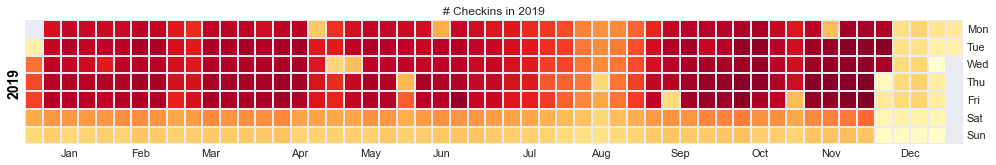

In [18]:
plt.figure(figsize=(14,10), dpi= 80)
calmap.calendarplot(dnb_2019['NB_VALD'], 
                    fig_kws={'figsize': (14,10)}, cmap= 'YlOrRd',
                    yearlabel_kws={'color':'black', 'fontsize':14},
                    subplot_kws={'title':'# Checkins in 2019'})
plt.show()


<Figure size 1120x800 with 0 Axes>

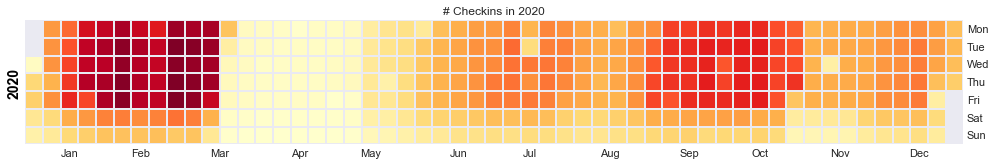

In [19]:
plt.figure(figsize=(14,10), dpi= 80)
calmap.calendarplot(dnb_2020['NB_VALD'], 
                    fig_kws={'figsize': (14,10)}, cmap='YlOrRd',
                    yearlabel_kws={'color':'black', 'fontsize':14}, 
                    subplot_kws={'title':'# Checkins in 2020'})
plt.show()

<Figure size 1120x800 with 0 Axes>

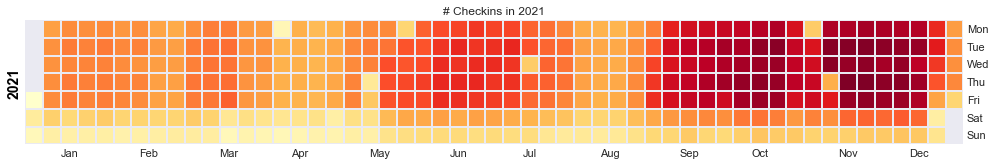

In [20]:
plt.figure(figsize=(14,10), dpi= 80)
calmap.calendarplot(dnb_2021['NB_VALD'], 
                    fig_kws={'figsize': (14,10)}, cmap='YlOrRd',
                    yearlabel_kws={'color':'black', 'fontsize':14}, 
                    subplot_kws={'title':'# Checkins in 2021'})
plt.show()

<Figure size 1120x800 with 0 Axes>

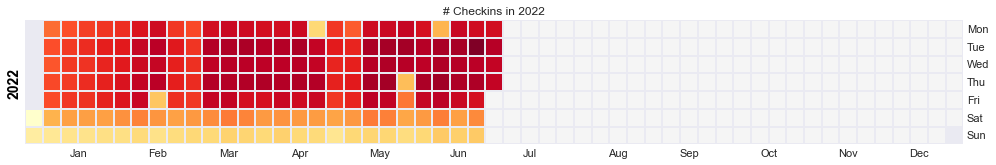

In [21]:
plt.figure(figsize=(14,10), dpi= 80)
calmap.calendarplot(dnb_2022['NB_VALD'], 
                    fig_kws={'figsize': (14,10)}, cmap='YlOrRd',
                    yearlabel_kws={'color':'black', 'fontsize':14}, 
                    subplot_kws={'title':'# Checkins in 2022'})
plt.show()

**5- How many tickets were checked-in to the Ile-de-France, in 2019, 2020, 2021 and 2022?**

Answer: There is 1696M, 926M, 1251M, and 817M tickets were checked-in in 2019, 2020, 2021 and 2022, respectively

In [22]:
# Total number of checkins in Ile-de-France, in 2019, 2020, 2021 and 2022
total_checkins = pd.DataFrame({'2019':[nb_2019['NB_VALD'].sum()], 
                               '2020':[nb_2020['NB_VALD'].sum()], 
                               '2021':[nb_2021['NB_VALD'].sum()], 
                               '2022':[nb_2022['NB_VALD'].sum()]}, index=['No_Ckeckins'])


total_checkins

,2019,2020,2021,2022
No_Ckeckins,1695721547,926003724,1251011175,816708564


**6- Which station is the most traffic in Ile-de-France, in 2019, 2020, 2021 and 2022?**

Answer: LA DEFENSE-GRANDE ARCHE, SAINT-LAZARE, SAINT-LAZARE, SAINT-LAZARE, with 54M, 41M, 50M, and 29M passengers checked-in per year, representing 3.19%, 4.4%, 4.01%, and 3.94% of the total traffic.
    


In [23]:
# Daily average of checkins per metro station
pvt_stations = nb_2019.pivot_table(values = 'NB_VALD', index = 'LIBELLE_ARRET', aggfunc = np.sum).reset_index()
pvt_stations['NB_VALD'] = pvt_stations['NB_VALD'].astype(int)
pvt_stations.nlargest(n=5, columns='NB_VALD')


,LIBELLE_ARRET,NB_VALD
309,LA DEFENSE-GRANDE ARCHE,54031939
600,SAINT-LAZARE,50354504
250,GARE DE LYON,33167663
251,GARE DU NORD,30258993
438,MONTPARNASSE,29349363


In [24]:
# DataFrame of aggregated NB_VALD per LIBELLE_ARRET
# Group by LIBELLE_ARRET and aggregate NB_VALD
gp_stop_2019 = nb_2019.groupby('LIBELLE_ARRET').sum()['NB_VALD'].to_frame().reset_index()
gp_stop_2020 = nb_2020.groupby('LIBELLE_ARRET').sum()['NB_VALD'].to_frame().reset_index()
gp_stop_2021 = nb_2021.groupby('LIBELLE_ARRET').sum()['NB_VALD'].to_frame().reset_index()
gp_stop_2022 = nb_2022.groupby('LIBELLE_ARRET').sum()['NB_VALD'].to_frame().reset_index()

gp_stop_2019.sort_values(by=['NB_VALD'],ascending=False, inplace=True)
gp_stop_2020.sort_values(by=['NB_VALD'],ascending=False, inplace=True)
gp_stop_2021.sort_values(by=['NB_VALD'],ascending=False, inplace=True)
gp_stop_2022.sort_values(by=['NB_VALD'],ascending=False, inplace=True)

In [25]:
gp_stop_checkins =pd.concat([gp_stop_2019.iloc[0,:], 
           gp_stop_2020.iloc[0,:],
           gp_stop_2021.iloc[0,:],
           gp_stop_2022.iloc[0,:]], axis=1, keys=['2019', '2020','2021', '2022'])
gp_stop_checkins

,2019,2020,2021,2022
LIBELLE_ARRET,LA DEFENSE-GRANDE ARCHE,SAINT-LAZARE,SAINT-LAZARE,SAINT-LAZARE
NB_VALD,54031939,40759088,50181779,28903407


In [26]:
# The Percentage of total checkins in station with most traffic in 2019, 2020, 2021, and 2022

(gp_stop_checkins.iloc[1,:]/total_checkins.iloc[0,:])*100

2019    3.18637
2020    4.40161
2021     4.0113
2022    3.53901
dtype: object

**7- Which station is the least traffic in Ile-de-France, in 2019, 2020, 2021 and 2022?**

Answer: COUDRAY-MONTCEAUX, COUILLY-SAINT-GERMAIN-QUINCY, BARBARA, MONTIGNY-SUR-LOING, with 5965, 2039, 20, and 1877 passengers per day on average.

In [27]:
print('In the following table you can see the station with the least traffic in  Ile-de-France, in 2019, 2020, 2021, and 2022 ')
pd.concat([gp_stop_2019.iloc[-1,:], 
           gp_stop_2020.iloc[-1,:],
           gp_stop_2021.iloc[-1,:],
           gp_stop_2022.iloc[-1,:]], axis=1, keys=['2019', '2020','2021', '2022'])


In the following table you can see the station with the least traffic in  Ile-de-France, in 2019, 2020, 2021, and 2022 


,2019,2020,2021,2022
LIBELLE_ARRET,COUDRAY-MONTCEAUX,COUILLY-SAINT-GERMAIN-QUINCY,BARBARA,MONTIGNY-SUR-LOING
NB_VALD,5965,2039,20,1877


**8- What is the most used ticket type in 2019, 2020, 2021, and 2022?**

Answer: As we can see from figuers bellow NAVIGO tickets represent more than 70%, 64%, 57%, and 56% of all checkins in 2019, 2020, 2021, 2022, followed by IMAGINE R with only 16% of all checkins. Other ticket types represent less than 7% of all checkins.

In [28]:
# DataFrame of most frequent TICKET_TYPE per STOP_NAME

# Total NB_CHECKINS grouped by TICKET_TYPE
gp_ticket_2019 = nb_2019.groupby(['CATEGORIE_TITRE']).sum()['NB_VALD'].to_frame().sort_values('NB_VALD', ascending=False)
gp_ticket_2020 = nb_2020.groupby(['CATEGORIE_TITRE']).sum()['NB_VALD'].to_frame().sort_values('NB_VALD', ascending=False)
gp_ticket_2021 = nb_2021.groupby(['CATEGORIE_TITRE']).sum()['NB_VALD'].to_frame().sort_values('NB_VALD', ascending=False)
gp_ticket_2022 = nb_2022.groupby(['CATEGORIE_TITRE']).sum()['NB_VALD'].to_frame().sort_values('NB_VALD', ascending=False)


In [29]:
gp_tt_prop_2019 = round((gp_ticket_2019/total_checkins.iloc[0,0])*100,2)
gp_tt_prop_2020 = round((gp_ticket_2020/total_checkins.iloc[0,1])*100,2)
gp_tt_prop_2021 = round((gp_ticket_2021/total_checkins.iloc[0,2])*100,2)
gp_tt_prop_2022 = round((gp_ticket_2022/total_checkins.iloc[0,3])*100,2)

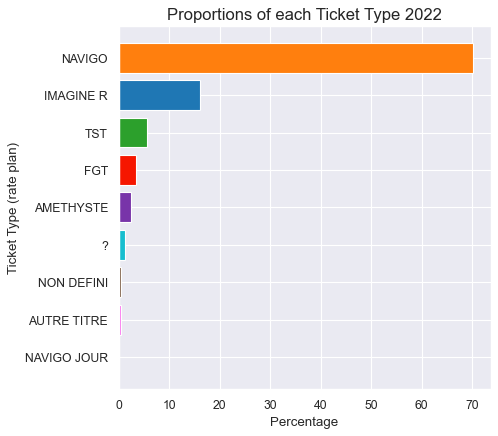

In [30]:
plt.figure(figsize=(6,6), dpi= 80)
tickets = gp_tt_prop_2019.index.tolist()
n_tickets = len(tickets)
y_pos = np.arange(n_tickets)
percentage = gp_tt_prop_2019.reset_index().NB_VALD.tolist()

colors=["#ff7f0e","#1f77b4","#2ca02c","#f61600","#7834a9","#17becf","#684427","#fa5deb","#17becf"]
plt.barh(y_pos, percentage, align='center', color=colors)
plt.title('Proportions of each Ticket Type 2022', fontsize=15)
plt.xlabel("Percentage")
plt.ylabel("Ticket Type (rate plan)")
plt.yticks(ticks=range(n_tickets), labels=tickets)
plt.gca().invert_yaxis()
plt.show()


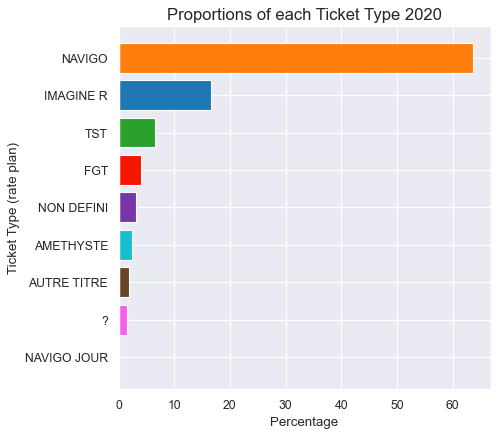

In [31]:
plt.figure(figsize=(6,6), dpi= 80)
tickets = gp_tt_prop_2020.index.tolist()
n_tickets = len(tickets)
y_pos = np.arange(n_tickets)
percentage = gp_tt_prop_2020.reset_index().NB_VALD.tolist()

plt.barh(y_pos, percentage, align='center', color=colors)
plt.title('Proportions of each Ticket Type 2020', fontsize=15)
plt.xlabel("Percentage")
plt.ylabel("Ticket Type (rate plan)")
plt.yticks(ticks=range(n_tickets), labels=tickets)
plt.gca().invert_yaxis()
plt.show()


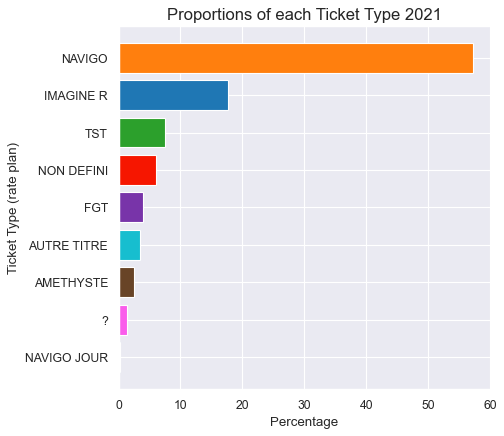

In [32]:
plt.figure(figsize=(6,6), dpi= 80)
tickets = gp_tt_prop_2021.index.tolist()
n_tickets = len(tickets)
y_pos = np.arange(n_tickets)
percentage = gp_tt_prop_2021.reset_index().NB_VALD.tolist()

plt.barh(y_pos, percentage, align='center', color=colors)
plt.title('Proportions of each Ticket Type 2021', fontsize=15)
plt.xlabel("Percentage")
plt.ylabel("Ticket Type (rate plan)")
plt.yticks(ticks=range(n_tickets), labels=tickets)
plt.gca().invert_yaxis()
plt.show()


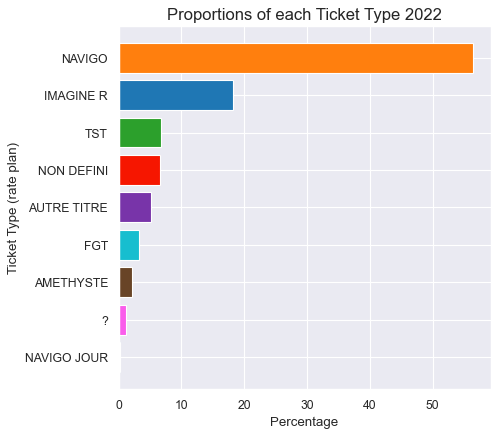

In [33]:
plt.figure(figsize=(6,6), dpi= 80)
tickets = gp_tt_prop_2022.index.tolist()
n_tickets = len(tickets)
y_pos = np.arange(n_tickets)
percentage = gp_tt_prop_2022.reset_index().NB_VALD.tolist()

plt.barh(y_pos, percentage, align='center', color=colors)
plt.title('Proportions of each Ticket Type 2022', fontsize=15)
plt.xlabel("Percentage")
plt.ylabel("Ticket Type (rate plan)")
plt.yticks(ticks=range(n_tickets), labels=tickets)
plt.gca().invert_yaxis()
plt.show()


In [34]:
gp_tt_prop_2019

,NB_VALD
CATEGORIE_TITRE,
NAVIGO,70.13
IMAGINE R,16.05
TST,5.56
FGT,3.49
AMETHYSTE,2.43
?,1.26
NON DEFINI,0.50
AUTRE TITRE,0.48
NAVIGO JOUR,0.10


In [35]:
gp_tt_prop_2022

,NB_VALD
CATEGORIE_TITRE,
NAVIGO,56.41
IMAGINE R,18.30
TST,6.70
NON DEFINI,6.59
AUTRE TITRE,5.13
FGT,3.25
AMETHYSTE,2.19
?,1.17
NAVIGO JOUR,0.25
